In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import time

import matplotlib.pyplot as plt

**Ссылка на репозитории:** https://github.com/tlutfullin/laba-of-KFU/tree/master

## Задание 2.1

In [2]:
df_top = pd.DataFrame({'Architecture': ['Cluster', 'MPP'], 
                       'Count': [500, 65], 'System Share (%)': [100, 13]})

In [3]:
df_top

,Architecture,Count,System Share (%)
0,Cluster,500,100
1,MPP,65,13


### 1) Какая архитектура наиболее популярна для  компьютеров, входящих в ТОП500

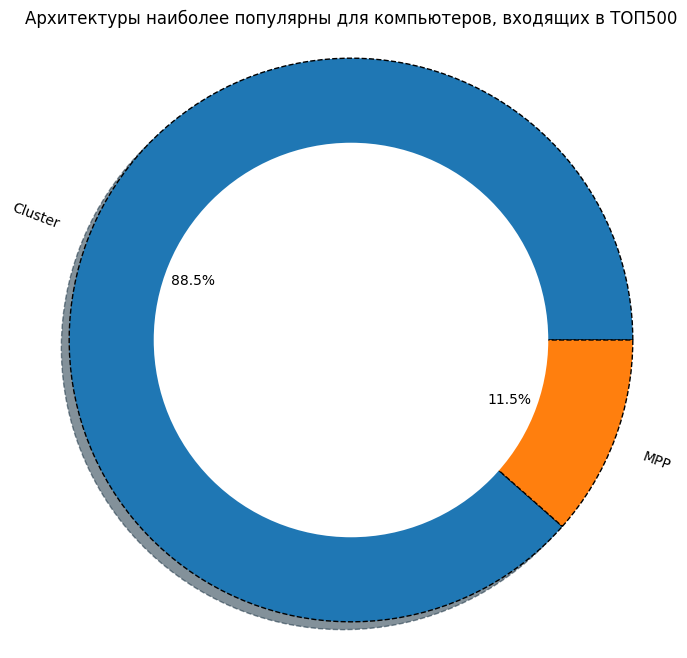

In [4]:
# Данные для построения круговой диаграммы (доли)
labels = df_top['Architecture']
sizes = df_top['System Share (%)']  # Процентные значения для каждой категории

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, 
        wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)

# # Опционально: добавление круга в центр диаграммы для обозначения общего значения
# plt.text(0, 0, 'Общее\nзначение', color='white', fontsize=12, ha='center')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Настройка аспекта равных осей, чтобы круг был кругом, а не эллипсом
plt.axis('equal')

# Опционально: добавление заголовка
plt.title('Архитектуры наиболее популярны для компьютеров, входящих в ТОП500')

# Отображение диаграммы
plt.show()

### 2) Какая операционная система наиболее популярна для  компьютеров, входящих в ТОП500

In [5]:
html_code = """<div class="google-visualization-table" style="position: relative; z-index: 0; max-width: 100%; max-height: 100%; width: 100%;"><div style="position: relative; overflow: auto; max-width: 100%; max-height: 100%; width: 100%;"><table cellspacing="0" class="google-visualization-table-table" style="width: 100%;"><thead><tr class="google-visualization-table-tr-head"><th class="google-visualization-table-th gradient unsorted">&nbsp;</th><th class="google-visualization-table-th gradient unsorted" tabindex="0" role="button" aria-label="Sort column">Operating System<span class="google-visualization-table-sortind"></span></th><th class="google-visualization-table-th gradient google-visualization-table-type-number unsorted" tabindex="0" role="button" aria-label="Sort column">Count<span class="google-visualization-table-sortind"></span></th><th class="google-visualization-table-th gradient google-visualization-table-type-number unsorted" tabindex="0" role="button" aria-label="Sort column">System Share (%)<span class="google-visualization-table-sortind"></span></th><th class="google-visualization-table-th gradient google-visualization-table-type-number unsorted" tabindex="0" role="button" aria-label="Sort column">Rmax (GFlops)<span class="google-visualization-table-sortind"></span></th><th class="google-visualization-table-th gradient google-visualization-table-type-number unsorted" tabindex="0" role="button" aria-label="Sort column">Rpeak (GFlops)<span class="google-visualization-table-sortind"></span></th><th class="google-visualization-table-th gradient google-visualization-table-type-number unsorted" tabindex="0" role="button" aria-label="Sort column">Cores<span class="google-visualization-table-sortind"></span></th></tr></thead><tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">223</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">44.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">979,137,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,713,762,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">21,804,672</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">CentOS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">46</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">242,163,540</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">415,922,268</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,675,388</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">HPE Cray OS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">25</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,944,811,380</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,691,159,971</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,427,136</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Cray Linux Environment </td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">135,384,984</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">205,430,039</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,622,328</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Red Hat Enterprise Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">660,971,420</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">815,056,701</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,404,960</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">bullx SCS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">50,020,060</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">77,285,081</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,797,224</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Ubuntu 20.04.1 LTS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">92,711,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">117,161,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">812,704</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Linux/TOSS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33,392,910</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">39,760,140</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">694,680</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">RHEL 7.7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">41,736,700</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84,978,446</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,204,288</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">SLES15 SP2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">62,748,300</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">80,972,530</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,493,456</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Ubuntu</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">22,413,600</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">82,365,595</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">324,784</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">CentOS Linux 7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">88,718,610</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">138,334,625</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,739,472</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">RHEL 7.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">56,673,970</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">79,499,650</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">929,712</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">VEOS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">47,142,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">60,691,990</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">208,064</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">RHEL 8.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">28,774,920</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">34,559,769</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">501,728</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Ubuntu 20.04.2 LTS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">74,303,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">99,309,540</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">655,712</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">RedHat Enterprise Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,833,330</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">26,552,220</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">384,368</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">RHEL 8.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">29,832,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">36,637,222</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">270,784</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">RHEL 8.3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33,357,680</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">43,941,660</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">362,816</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">AlmaLinux 8.5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,050,250</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,795,954</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">246,184</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">Ubuntu 16.04.3 LTS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">66,360,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">98,228,920</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">629,760</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">SUSE Linux Enterprise Server 11</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,679,850</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">24,000,510</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">738,800</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">23</td><td colspan="1" class="google-visualization-table-td">RHEL</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,678,620</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15,828,040</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">222,752</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">24</td><td colspan="1" class="google-visualization-table-td">RHEL 7.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163,132,460</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">222,997,778</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,721,492</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">25</td><td colspan="1" class="google-visualization-table-td">Ubuntu 16.04</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">50,360,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">70,080,460</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">459,296</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">26</td><td colspan="1" class="google-visualization-table-td">Ubuntu 18.04.01</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18,779,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">24,217,959</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">274,896</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">27</td><td colspan="1" class="google-visualization-table-td">Ubuntu 20.04</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">103,978,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">180,286,012</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">685,920</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">28</td><td colspan="1" class="google-visualization-table-td">SUSE Linux Enterprise Server 12 SP1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18,526,020</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">27,252,925</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">408,248</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">29</td><td colspan="1" class="google-visualization-table-td">Rocky Linux 8.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,615,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15,993,280</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">122,848</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">30</td><td colspan="1" class="google-visualization-table-td">Rocky Linux 8.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,907,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">22,749,820</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">378,400</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">31</td><td colspan="1" class="google-visualization-table-td">Ubuntu 22.04</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">583,050,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">880,684,540</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,164,160</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">32</td><td colspan="1" class="google-visualization-table-td">Tri-Lab Operating System </td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">28,404,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">37,652,740</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">992,816</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">33</td><td colspan="1" class="google-visualization-table-td">RedHat 9.1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">178,301,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">311,945,626</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,406,720</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">34</td><td colspan="1" class="google-visualization-table-td">Ubuntu 22.04.3 LTS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">126,357,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">196,781,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">503,408</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">35</td><td colspan="1" class="google-visualization-table-td">Redhat Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,497,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,225,685</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">55,080</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">36</td><td colspan="1" class="google-visualization-table-td">Rocky Linux 8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,695,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,824,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">83,712</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">37</td><td colspan="1" class="google-visualization-table-td">RHEL 8.7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,835,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16,984,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">256,192</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">38</td><td colspan="1" class="google-visualization-table-td">RHEL 7.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,829,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,592,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">126,720</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">39</td><td colspan="1" class="google-visualization-table-td">CentOS Linux 8.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,730,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,081,210</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">86,688</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">40</td><td colspan="1" class="google-visualization-table-td">SUSE Linux Enterprise Server 15 SP2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14,035,980</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">24,834,660</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">211,392</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">41</td><td colspan="1" class="google-visualization-table-td">RHEL compatible</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,806,560</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18,291,180</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">172,544</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">42</td><td colspan="1" class="google-visualization-table-td">Kylin Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">63,515,890</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">103,753,198</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,156,480</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">43</td><td colspan="1" class="google-visualization-table-td">Linux/TOSS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,981,150</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,652,140</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">156,992</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">44</td><td colspan="1" class="google-visualization-table-td">SUSE Linux Enterprise Server 12 SP3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">22,202,678</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">30,635,520</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">343,776</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">45</td><td colspan="1" class="google-visualization-table-td">SUSE Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,996,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">13,508,275</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">173,056</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">46</td><td colspan="1" class="google-visualization-table-td">RHEL 7.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,443,700</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,601,984</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">73,920</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">47</td><td colspan="1" class="google-visualization-table-td">Rocky Linux 8.7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,340,290</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,174,640</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">106,496</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">48</td><td colspan="1" class="google-visualization-table-td">NVIDIA DGX OS 5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,950,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14,908,610</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">98,208</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">49</td><td colspan="1" class="google-visualization-table-td">Scientific Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,271,380</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,688,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">50,176</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">50</td><td colspan="1" class="google-visualization-table-td">SLES12 SP2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,444,640</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,316,518</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">124,416</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">51</td><td colspan="1" class="google-visualization-table-td">Rocky Linux 8.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,458,300</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">53,852,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">156,864</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">52</td><td colspan="1" class="google-visualization-table-td">RHEL 6.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,478,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,345,562</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,960</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">53</td><td colspan="1" class="google-visualization-table-td">Amazon Linux 2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,950,260</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15,106,520</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">172,692</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">54</td><td colspan="1" class="google-visualization-table-td">SLES15 SP4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,190,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">27,957,420</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">149,760</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">55</td><td colspan="1" class="google-visualization-table-td">TOSS 4 Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,589,480</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,752,510</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">43,008</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">56</td><td colspan="1" class="google-visualization-table-td">SUSE Linux Enterprise Server 15 SP4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">585,340,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,059,325,750</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,742,808</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">57</td><td colspan="1" class="google-visualization-table-td">RHEL 8.5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,625,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,864,830</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">57,344</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">58</td><td colspan="1" class="google-visualization-table-td">RHEL 9.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,140,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,007,410</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33,408</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">59</td><td colspan="1" class="google-visualization-table-td">Bullx Linux</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,010,680</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,962,880</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">99,072</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">60</td><td colspan="1" class="google-visualization-table-td">Redhat Enterprise Linux 6.5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,249,680</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,041,280</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">76,032</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">61</td><td colspan="1" class="google-visualization-table-td">RHEL 7.3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,547,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,229,850</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">50,816</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">62</td><td colspan="1" class="google-visualization-table-td">Redhat Enterprise Linux 7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,540,690</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,912,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">72,000</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">63</td><td colspan="1" class="google-visualization-table-td">Sunway RaiseOS 2.0.5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">64</td><td colspan="1" class="google-visualization-table-td">Redhat 7.9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,499,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,707,020</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">27,680</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">65</td><td colspan="1" class="google-visualization-table-td">AlmaLinux 9.1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,117,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,627,070</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,920</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">66</td><td colspan="1" class="google-visualization-table-td">CentOS Scientific-OpenStack</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,158,110</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,014,730</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">71,232</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">67</td><td colspan="1" class="google-visualization-table-td">Ubuntu 18.04 LTS</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">30,050,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">39,531,150</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">253,440</td></tr></tbody></table></div></div>"""

In [6]:
def parser_table(html_code):
    # Используем BeautifulSoup для разбора HTML
    soup = BeautifulSoup(html_code, 'html.parser')

    df = pd.DataFrame(columns=['Operating System', 'Count', 'System Share (%)', 'Rmax (GFlops)', 
                               'Rpeak (GFlops)', 'Cores'])
    
    # Находим все строки таблицы <tr>
    rows = soup.find_all('tr')

    # Заполняем DataFrame данными из каждой строки
    for row in rows[1:]:
        # Находим все ячейки <td> внутри строки <tr>
        cells = row.find_all('td')

        # Извлекаем текст из каждой ячейки и добавляем его в список соответствующего столбца

        system = cells[1].text
        
        count = int(cells[2].text)
        
        share = float(cells[3].text)
        
        rmax = int(cells[4].text.replace(',', ''))
        
        rpeak = int(cells[5].text.replace(',', ''))
        
        cores = int(cells[6].text.replace(',', ''))
  
        # Создаем DataFrame
        df_data = {
            'Operating System': system,
            'Count': count,
            'System Share (%)': share,
            'Rmax (GFlops)': rmax,
            'Rpeak (GFlops)': rpeak,
            'Cores': cores
        }

        
        # Создаем pandas DataFrame
        df = df._append(df_data, ignore_index=True)

    return df

df_system = parser_table(html_code)

/tmp/ipykernel_12661/2800729097.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(df_data, ignore_index=True)


In [7]:
df_system

,Operating System,Count,System Share (%),Rmax (GFlops),Rpeak (GFlops),Cores
0,Linux,223,44.6,979137500,1713762200,21804672
1,CentOS,46,9.2,242163540,415922268,4675388
2,HPE Cray OS,25,5.0,1944811380,2691159971,17427136
3,Cray Linux Environment,23,4.6,135384984,205430039,4622328
4,Red Hat Enterprise Linux,14,2.8,660971420,815056701,11404960
...,...,...,...,...,...,...
62,Sunway RaiseOS 2.0.5,1,0.2,93014594,125435904,10649600
63,Redhat 7.9,1,0.2,2499000,4707020,27680
64,AlmaLinux 9.1,1,0.2,2117000,2627070,17920
65,CentOS Scientific-OpenStack,1,0.2,3158110,5014730,71232


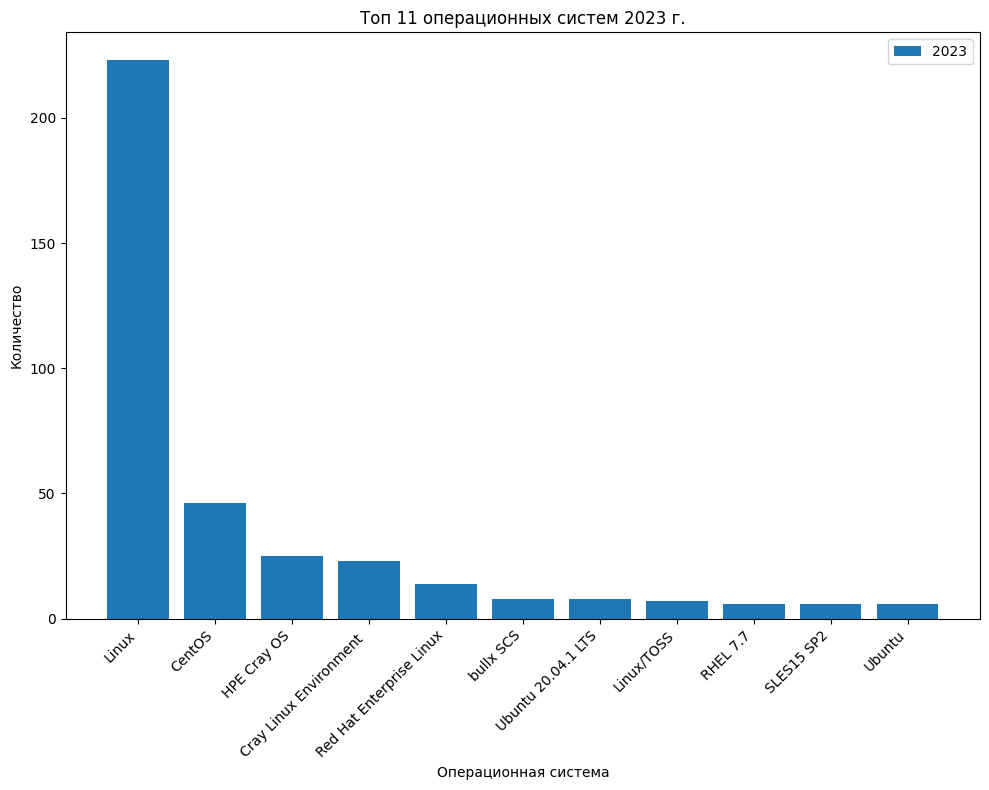

In [8]:
plt.figure(figsize=(10, 8))
# Строим гистограмму для одного из столбцов, так как все столбцы имеют одинаковые значения
plt.bar(df_system['Operating System'].iloc[:11], df_system['Count'].iloc[:11], label='2023')

plt.title('Топ 11 операционных систем 2023 г.')
plt.legend()  # Добавляем легенду
plt.xlabel('Операционная система')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.legend()

# Показываем график
plt.show()

### Выводы:

- Проведенный анализ операционных систем, применяемых в суперкомпьютерах, подтверждает превалирование Linux в данной области. Необходимо отметить, что в списке операционных систем суперкомпьютеров отсутствует Windows, что свидетельствует о низкой популярности данной операционной системы среди разработчиков и пользователей в этом сегменте вычислительной техники.

- Относительно архитектуры суперкомпьютеров следует отметить, что cluster-архитектура является наиболее распространенной. Её преобладание в списке архитектур суперкомпьютеров на порядок превышает использование архитектуры MPP (Massively Parallel Processing). Этот факт указывает на значительное преимущество и широкое применение cluster-архитектуры в суперкомпьютерных системах.

## Задание 2.2

### 1)  Какие процессоры за последние 10 лет использовались  для  компьютеров, входящих в ТОП500.

In [9]:
processor_gener_1 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 62xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">90</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">309,750,210</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">590,179,344</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,716,808</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">71</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">219,862,930</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">457,722,605</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,323,780</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">AMD Zen-2 (Rome)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">69</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">13.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">719,594,360</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,006,709,682</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,863,896</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">AMD Zen-3 (Milan)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">66</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">13.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,090,712,680</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,957,925,147</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,296,256</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 82xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">40</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">141,689,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">302,171,808</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,926,572</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 83xx (Ice Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">35</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">403,499,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">588,405,140</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,866,124</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">21</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">116,875,998</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">176,880,265</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,166,436</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Sapphire Rapids)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,028,019,780</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,627,948,254</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,625,760</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">69,439,194</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">86,885,131</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,048,008</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">55,574,730</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">75,864,262</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,653,660</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Fujitsu A64FX</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">530,839,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">641,021,027</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,105,408</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">80,727,150</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">153,898,109</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,502,580</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">IBM POWER9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">311,567,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">417,833,327</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,081,600</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">82,952,960</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">132,610,282</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,841,172</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 92xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23,779,910</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">34,305,028</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">465,896</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Max</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">632,423,070</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,120,413,090</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,692,008</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">AMD Zen-4 (Genoa)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">48,755,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">55,442,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,167,456</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">Vector Engine</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">47,142,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">60,691,990</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">208,064</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">Xeon Silver (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,881,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,457,120</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">349,184</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Sapphire Rapids)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,536,020</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,063,230</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">40,960</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,539,130</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,388,032</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">194,616</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 63xx (Ice Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,140,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,007,410</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33,408</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">23</td><td colspan="1" class="google-visualization-table-td">Hygon Dhyana</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,325,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,134,170</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163,840</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">24</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,566,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,701,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">186,368</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">25</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">26</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 42xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,632,450</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,529,600</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">144,000</td></tr></tbody> """
processor_gener_2 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">120</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">24</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">311,057,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">705,731,261</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,526,864</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 62xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">99</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">326,214,970</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">618,506,771</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,065,328</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">AMD Zen-2 (Rome)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">57</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">565,738,130</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">779,012,422</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,846,768</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 82xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">44</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">151,930,370</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">320,276,179</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,134,060</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">AMD Zen-3 (Milan)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">43</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,804,705,250</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,657,099,047</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16,159,200</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">26</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">126,066,978</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">192,068,233</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,350,756</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">26</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84,679,024</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">114,614,725</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,796,860</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 83xx (Ice Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">22</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">289,874,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">435,207,810</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,225,612</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">61,153,720</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84,067,932</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,877,788</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">82,557,010</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">158,227,837</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,583,220</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">82,952,960</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">132,610,282</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,841,172</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">IBM POWER9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">311,567,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">417,833,327</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,081,600</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 92xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23,779,910</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">34,305,028</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">465,896</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Vector Engine</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">36,488,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">48,794,710</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">161,216</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Fujitsu A64FX</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">487,340,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">590,414,137</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,386,560</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Xeon Silver (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,881,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,457,120</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">349,184</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">AMD Naples</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,746,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,568,192</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">145,920</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">Marvell ThunderX2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,833,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,298,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">143,640</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">Hygon Dhyana</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,325,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,134,170</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163,840</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 42xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,632,450</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,529,600</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">144,000</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,566,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,701,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">186,368</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">23</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Haswell-Ex)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,741,020</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">81,410,560</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,312,800</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">24</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,539,130</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,388,032</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">194,616</td></tr></tbody> """
processor_gener_3 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">25</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">319,220,918</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">718,642,305</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,692,400</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">180,510,064</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">243,092,709</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,252,860</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 62xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">80</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">281,019,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">523,936,350</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,687,572</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">AMD Zen-2 (Rome)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">54</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">541,754,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">750,799,842</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,122,160</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 82xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">35</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">123,394,730</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">263,684,689</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,473,292</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">27</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">127,738,348</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">195,358,345</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,399,716</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">69,318,450</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">94,511,292</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,130,316</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">AMD Zen-3 (Milan)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">169,952,330</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">234,299,100</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,929,504</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 83xx (Ice Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">76,237,630</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">118,434,730</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,184,452</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,111,610</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">183,141,296</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,139,324</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">82,952,960</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">132,610,282</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,841,172</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">IBM POWER9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">311,567,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">417,833,327</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,081,600</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 92xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23,779,910</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">34,305,028</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">465,896</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Fujitsu A64FX</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">489,340,300</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">592,773,433</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,423,424</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Vector Engine</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">25,003,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33,846,360</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">111,360</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Xeon Silver (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,881,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,457,120</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">349,184</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Haswell-Ex)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,393,510</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84,170,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,391,200</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">AMD Naples</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,407,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,041,152</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">246,720</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,566,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,701,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">186,368</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">Hygon Dhyana</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,325,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,134,170</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163,840</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,539,130</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,388,032</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">194,616</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">23</td><td colspan="1" class="google-visualization-table-td">Marvell ThunderX2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,833,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,298,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">143,640</td></tr></tbody> """
processor_gener_4 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">32.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">373,439,988</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">812,886,069</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,036,584</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">140</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">28</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">268,664,224</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">376,073,808</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,472,624</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 62xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">49</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">181,629,460</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">323,872,144</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,886,588</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">31</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,905,488</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">196,183,217</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,406,096</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">24</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">81,186,160</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">111,489,845</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,568,522</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">AMD Zen-2 (Rome)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">192,621,740</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">267,506,250</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,754,688</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 82xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">83,957,020</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">138,730,409</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,748,976</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,111,610</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">183,141,296</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,139,324</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">IBM POWER9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">313,031,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">419,573,103</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,104,640</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84,595,496</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">135,160,810</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,959,252</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Xeon Silver (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,784,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">29,229,920</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">464,184</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Fujitsu A64FX</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">467,219,300</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">566,821,173</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,054,784</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 92xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,694,360</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">25,487,156</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">345,512</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,718,600</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,138,928</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">389,400</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">AMD Naples</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,407,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,041,152</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">246,720</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Vector Engine</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,488,300</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14,870,640</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">49,408</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Haswell-Ex)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,393,510</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84,170,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,391,200</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">Marvell ThunderX2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,833,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,298,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">143,640</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">SPARC64 XIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,157,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,481,056</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">110,160</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">POWER7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,587,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,931,625</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">62,944</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">Power BQC</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,431,102</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,677,722</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">131,072</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">23</td><td colspan="1" class="google-visualization-table-td">Hygon Dhyana</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,325,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,134,170</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163,840</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">24</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,566,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,701,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">186,368</td></tr></tbody> """
processor_gener_5 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">183</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">36.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">316,739,428</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">462,187,307</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,456,916</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">165</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">350,634,616</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">739,254,015</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,358,408</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">127,188,088</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">199,073,369</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,443,776</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">30</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">92,881,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">129,750,585</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,056,458</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Xeon Gold 62xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">40,298,480</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">65,740,898</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">814,756</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">111,217,450</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">210,162,454</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,703,932</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">87,507,198</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">139,035,830</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,161,076</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">IBM POWER9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">293,531,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">393,397,642</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,794,880</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,873,215</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14,827,568</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">609,144</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 82xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">39,878,570</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">64,734,412</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">726,272</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Power BQC</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">31,484,244</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">36,909,876</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,883,584</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Xeon Silver (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,311,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18,861,760</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">261,800</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,622,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">13,420,985</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">383,040</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">SPARC64 XIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,443,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,346,118</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">285,264</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">AMD Naples</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,407,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,041,152</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">246,720</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">AMD Zen-2 (Rome)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,952,370</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,525,004</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">203,264</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Haswell-Ex)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,393,510</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">84,170,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,391,200</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum 92xx (Cascade Lake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,597,180</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,223,488</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">166,080</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">POWER7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,587,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,931,625</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">62,944</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">Opteron 6200 Series "Interlagos"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,167,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,505,280</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">150,528</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">Marvell ThunderX2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,833,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,298,240</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">143,640</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">Hygon Dhyana</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,325,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,134,170</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163,840</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">23</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">24</td><td colspan="1" class="google-visualization-table-td">Fujitsu A64FX</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,999,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,359,296</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">36,864</td></tr></tbody> """
processor_gener_6 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">233</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">46.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">343,419,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">534,211,751</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">13,421,340</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">99</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">186,803,148</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">350,602,129</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,397,980</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">71</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">132,813,508</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">207,119,809</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,280,242</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">22</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">83,895,020</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">131,010,901</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,714,320</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">117,874,559</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">221,190,217</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,956,364</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">92,750,369</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">145,607,581</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,394,996</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,491,978</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,142,685</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">877,312</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Power BQC</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">34,525,337</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">40,475,034</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,162,112</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">SPARC64 XIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,422,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,530,310</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">354,384</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">IBM POWER9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">255,877,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">349,583,378</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,258,376</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,523,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15,121,195</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">461,700</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,102,769</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,893,696</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">141,120</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Xeon Silver (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,683,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,160,960</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">109,800</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Opteron 6200 Series "Interlagos"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18,757,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">28,617,830</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">711,168</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Marvell ThunderX2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,529,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,005,248</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,328</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Hygon Dhyana</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,325,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,134,170</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">163,840</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">SPARC64 VIIIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,510,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,280,384</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">705,024</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EX)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,050,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,254,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">138,368</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">POWER7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,587,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,931,625</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">62,944</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr></tbody> """
processor_gener_7 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">203</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">40.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">243,742,838</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">392,128,725</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">29,947,332</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">177</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">35.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">203,331,437</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">330,955,784</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,403,782</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">76,260,115</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">117,456,816</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,239,418</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Xeon Gold (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,593,191</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">30,236,421</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">435,564</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">80,860,069</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">172,515,626</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,814,616</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16,441,302</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,533,946</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,092,716</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Power BQC</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">48,120,806</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">56,413,390</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,407,296</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">SPARC64 XIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,422,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,530,310</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">354,384</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,295,600</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16,463,946</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">514,948</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Opteron 6200 Series "Interlagos"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,920,100</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">30,334,435</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">820,280</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Xeon Platinum (Skylake)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,548,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14,218,115</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">250,336</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,833,215</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,463,616</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">128,320</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">POWER7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,587,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,931,625</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">62,944</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Haswell-Ex)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">822,723</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,495,859</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">42,496</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">662,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,324,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">72,000</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EX)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,050,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,254,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">138,368</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">SPARC64 VIIIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,510,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,280,384</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">705,024</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">SPARC64 IXfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,043,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,135,411</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">76,800</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">IBM Power8+</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">615,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">951,155</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,560</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">ShenWei</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">795,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,070,160</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">137,200</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">Opteron 6100-series "Magny-Cours" </td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,110,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,365,811</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">142,272</td></tr></tbody> """
processor_gener_8 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">223</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">44.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">202,294,262</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">322,683,975</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,351,062</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">97</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">104,564,460</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">180,204,768</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,395,866</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Broadwell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">69</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">13.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">81,920,714</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">104,083,286</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,819,408</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">40</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">33,853,704</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">47,335,432</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,484,078</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Power BQC</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">52,056,338</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">61,027,126</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,767,744</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Intel Xeon Phi</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">45,074,671</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">83,137,280</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,876,040</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,757,393</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,487,203</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">553,756</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,633,568</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,983,232</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">341,920</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (Haswell-Ex)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,129,811</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,273,088</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">147,936</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">SPARC64 XIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,422,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,530,310</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">354,384</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Opteron 6200 Series "Interlagos"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,920,100</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">30,334,435</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">820,280</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">POWER7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,456,600</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,949,481</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">98,784</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">930,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,510,046</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">71,880</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Opteron 6300 Series "Abu Dhabi"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">880,286</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,867,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">468,000</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EX)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,050,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,254,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">138,368</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Xeon E7 (Westmere-EX)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">354,300</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">655,258</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">38,400</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">SPARC64 VIIIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,510,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,280,384</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">705,024</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">SPARC64 IXfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,043,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,135,411</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">76,800</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">Opteron 6100-series "Magny-Cours" </td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,110,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,365,811</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">142,272</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">ShenWei</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">795,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,070,160</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">137,200</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">Sunway</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr></tbody> """
processor_gener_9 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">158</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">31.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">120,014,999</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">201,217,348</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,421,278</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">139</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">27.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">120,681,277</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">191,272,568</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,125,742</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">118</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">62,585,931</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">88,627,249</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,305,047</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Power BQC</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">52,056,338</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">61,027,126</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,767,744</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,323,706</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">22,080,558</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">815,644</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Opteron 6200 Series "Interlagos"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">20,967,117</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">31,699,293</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">934,424</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">POWER7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,455,442</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,146,720</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">139,072</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Opteron 6100-series "Magny-Cours" </td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,443,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,562,726</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">492,000</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Opteron 6300 Series "Abu Dhabi"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,140,661</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,159,578</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">699,328</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">SPARC64 XIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,454,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,359,769</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">285,696</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E7 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,583,968</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,954,432</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">229,920</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,466,431</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,130,314</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">129,024</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E3 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">444,626</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">783,181</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">32,072</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EX)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,050,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,254,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">138,368</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Xeon E7 (Westmere-EX)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">354,300</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">655,258</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">38,400</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Xeon 5400-series "Harpertown"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">237,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">267,878</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23,040</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">ShenWei</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">795,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,070,160</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">137,200</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">SPARC64 VIIIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,510,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,280,384</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">705,024</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">SPARC64 IXfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,043,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,135,411</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">76,800</td></tr></tbody> """
processor_gener_10 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (SandyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">231</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">46.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">81,084,622</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">128,774,507</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,302,289</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (IvyBridge)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">134</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">26.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,436,195</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">141,949,807</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,807,452</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E5 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">26</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">21,364,452</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">29,330,816</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">725,968</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Power BQC</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">26</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">53,190,140</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">62,285,416</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,866,048</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Xeon 5600-series (Westmere-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">25</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,822,333</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">24,836,969</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,035,476</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">POWER7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">13</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,030,567</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,220,430</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">239,232</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Opteron 6200 Series "Interlagos"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">22,935,060</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">34,179,024</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,208,120</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Opteron 6100-series "Magny-Cours" </td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,491,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,858,227</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">644,868</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EP)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,254,631</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,990,729</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">203,120</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Xeon 5400-series "Harpertown"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">417,434</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">514,918</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">47,744</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Opteron Quad Core</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">346,200</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">434,688</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">51,680</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">SPARC64 IXfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,209,700</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,317,077</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">89,088</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Opteron 4100-series "Lisbon"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">317,561</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">485,453</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">57,792</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">PowerPC 450</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">190,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">222,822</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">65,536</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Xeon 5500-series (Nehalem-EX)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,050,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,254,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">138,368</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">ShenWei</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">795,900</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,070,160</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">137,200</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">Opteron 6300 Series "Abu Dhabi"</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">337,175</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">589,978</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">64,128</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">SPARC64 VIIIfx</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,510,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">11,280,384</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">705,024</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">Intel Xeon E3 (Haswell)</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">238,226</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">466,560</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16,200</td></tr></tbody> """

processor_gener_list = [processor_gener_1, processor_gener_2, processor_gener_3, processor_gener_4,
                       processor_gener_5, processor_gener_6, processor_gener_7, processor_gener_8,
                       processor_gener_9, processor_gener_10]

In [10]:
def parser_table_processor(html_code):
    # Используем BeautifulSoup для разбора HTML
    soup = BeautifulSoup(html_code, 'html.parser')

    df = pd.DataFrame(columns=['Processor Generation', 'Count', 'System Share (%)', 'Rmax (GFlops)', 
                               'Rpeak (GFlops)', 'Cores'])
   
    # Находим все строки таблицы <tr>
    rows = soup.find_all('tr')
    # Заполняем DataFrame данными из каждой строки
    for row in rows[:]:
        # Находим все ячейки <td> внутри строки <tr>
        cells = row.find_all('td')

        # Извлекаем текст из каждой ячейки и добавляем его в список соответствующего столбца
        system = cells[1].text
        count = int(cells[2].text)
        share = float(cells[3].text)
        rmax = int(cells[4].text.replace(',', ''))
        rpeak = int(cells[5].text.replace(',', ''))    
        cores = int(cells[6].text.replace(',', ''))
  
        # Создаем DataFrame
        df_data = {
            'Processor Generation': system,
            'Count': count,
            'System Share (%)': share,
            'Rmax (GFlops)': rmax,
            'Rpeak (GFlops)': rpeak,
            'Cores': cores
        }
      
        # Создаем pandas DataFrame
        df = df._append(df_data, ignore_index=True)

    return df

In [11]:
df_processor_gener = pd.DataFrame(columns=['Processor Generation', 'Count', 'System Share (%)', 'Rmax (GFlops)', 
                               'Rpeak (GFlops)', 'Cores'])

for processor_gener in processor_gener_list:
    df_processor = parser_table_processor(processor_gener)
    df_processor_gener = pd.concat([df_processor_gener, df_processor], ignore_index=True)
    
df_processor_gener

/tmp/ipykernel_12661/268400747.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(df_data, ignore_index=True)
/tmp/ipykernel_12661/892544787.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_processor_gener = pd.concat([df_processor_gener, df_processor], ignore_index=True)
/tmp/ipykernel_12661/268400747.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA c

,Processor Generation,Count,System Share (%),Rmax (GFlops),Rpeak (GFlops),Cores
0,Xeon Gold 62xx (Cascade Lake),90,18.0,309750210,590179344,7716808
1,Xeon Gold (Skylake),71,14.2,219862930,457722605,5323780
2,AMD Zen-2 (Rome),69,13.8,719594360,1006709682,11863896
3,AMD Zen-3 (Milan),66,13.2,2090712680,2957925147,20296256
4,Xeon Platinum 82xx (Cascade Lake),40,8.0,141689900,302171808,2926572
...,...,...,...,...,...,...
217,Xeon 5500-series (Nehalem-EX),1,0.2,1050000,1254550,138368
218,ShenWei,1,0.2,795900,1070160,137200
219,"Opteron 6300 Series ""Abu Dhabi""",1,0.2,337175,589978,64128
220,SPARC64 VIIIfx,1,0.2,10510000,11280384,705024


In [12]:
df_processor_gener_top = df_processor_gener.groupby(['Processor Generation']).sum().sort_values('Count', ascending=False)
df_processor_gener_top.head()

,Count,System Share (%),Rmax (GFlops),Rpeak (GFlops),Cores
Processor Generation,,,,,
Intel Xeon E5 (Broadwell),956,191.2,1589114886,2313277442,79215348
Xeon Gold (Skylake),758,151.6,1780611991,3815074805,46771580
Intel Xeon E5 (Haswell),733,146.6,1040599896,1577046868,44173540
Intel Xeon E5 (IvyBridge),476,95.2,907987712,1458463806,65902854
Intel Xeon E5 (SandyBridge),424,84.8,231666742,337544411,16643834


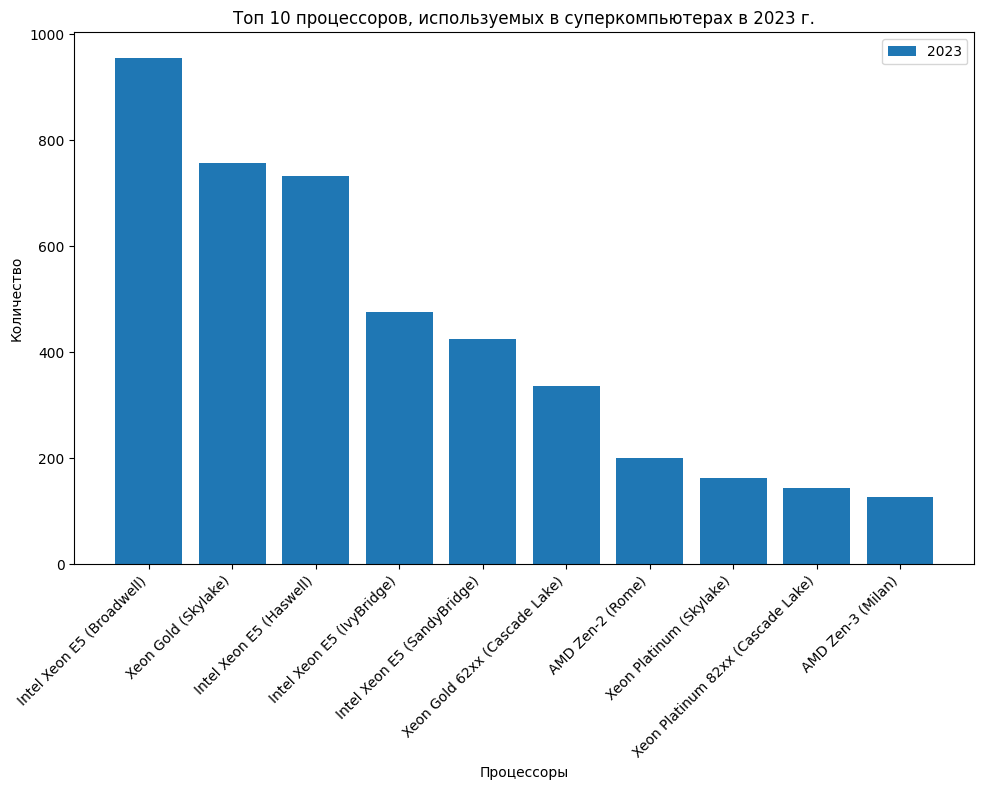

In [13]:
# Распредление количества стран, которые входили в топ 10 каждый  квартал
plt.figure(figsize=(10, 8))
# Строим гистограмму для одного из столбцов, так как все столбцы имеют одинаковые значения
plt.bar(df_processor_gener_top.index[:10], df_processor_gener_top['Count'].iloc[:10], label='2023')

plt.title('Топ 10 процессоров, используемых в суперкомпьютерах в 2023 г.')
plt.legend()  # Добавляем легенду
plt.xlabel('Процессоры')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.legend()

# Показываем график
plt.show()

### 2) Сколько ядер в процессорах и суперкомпьютерах.

In [14]:
html_cores_socket = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">24</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">107</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">21.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">436,079,848</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">804,509,736</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,873,588</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">64</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">105</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">21</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,425,069,840</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,385,559,453</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">28,631,072</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">20</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">53</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">208,004,640</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">396,361,425</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,782,968</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">32</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">37</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">464,445,970</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">671,252,646</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,090,160</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">16</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">31</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">123,862,840</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">186,769,375</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,592,084</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">18</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">30</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">126,516,974</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">183,233,061</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,077,364</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">28</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">26</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">92,603,540</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">171,131,657</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,009,728</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">48</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">25</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,338,441,010</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,897,535,546</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,480,008</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">12</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">115,986,330</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">190,271,772</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6,730,072</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">56</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">284,832,080</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">401,098,166</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,992,032</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">36</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">32,051,930</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">53,631,920</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">421,056</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">36,971,530</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">58,884,652</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">619,768</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">68</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">73,806,250</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">142,236,797</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,222,260</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">14</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,927,270</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">69,204,673</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">420,932</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">38</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">52,469,810</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">78,382,760</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">865,068</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">22</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">270,623,670</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">363,337,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,581,336</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">10</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16,293,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23,975,829</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">458,708</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">18</td><td colspan="1" class="google-visualization-table-td">40</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">155,865,480</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">290,421,760</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,018,560</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">19</td><td colspan="1" class="google-visualization-table-td">52</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">602,858,080</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,081,711,209</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,081,224</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">20</td><td colspan="1" class="google-visualization-table-td">26</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14,437,430</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">25,887,440</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">365,024</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">21</td><td colspan="1" class="google-visualization-table-td">96</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">43,951,800</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">48,717,250</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,104,000</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">22</td><td colspan="1" class="google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,161,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,371,776</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">60,480</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">23</td><td colspan="1" class="google-visualization-table-td">260</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,014,594</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">125,435,904</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,649,600</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">24</td><td colspan="1" class="google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,566,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,701,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">186,368</td></tr></tbody>"""

In [15]:
df_cores_socket = parser_table_processor(html_cores_socket)
df_cores_socket = df_cores_socket.rename(columns={'Processor Generation': 'Cores per Socket'})
df_cores_socket.head()

/tmp/ipykernel_12661/268400747.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(df_data, ignore_index=True)


,Cores per Socket,Count,System Share (%),Rmax (GFlops),Rpeak (GFlops),Cores
0,24,107,21.4,436079848,804509736,8873588
1,64,105,21.0,2425069840,3385559453,28631072
2,20,53,10.6,208004640,396361425,4782968
3,32,37,7.4,464445970,671252646,5090160
4,16,31,6.2,123862840,186769375,2592084


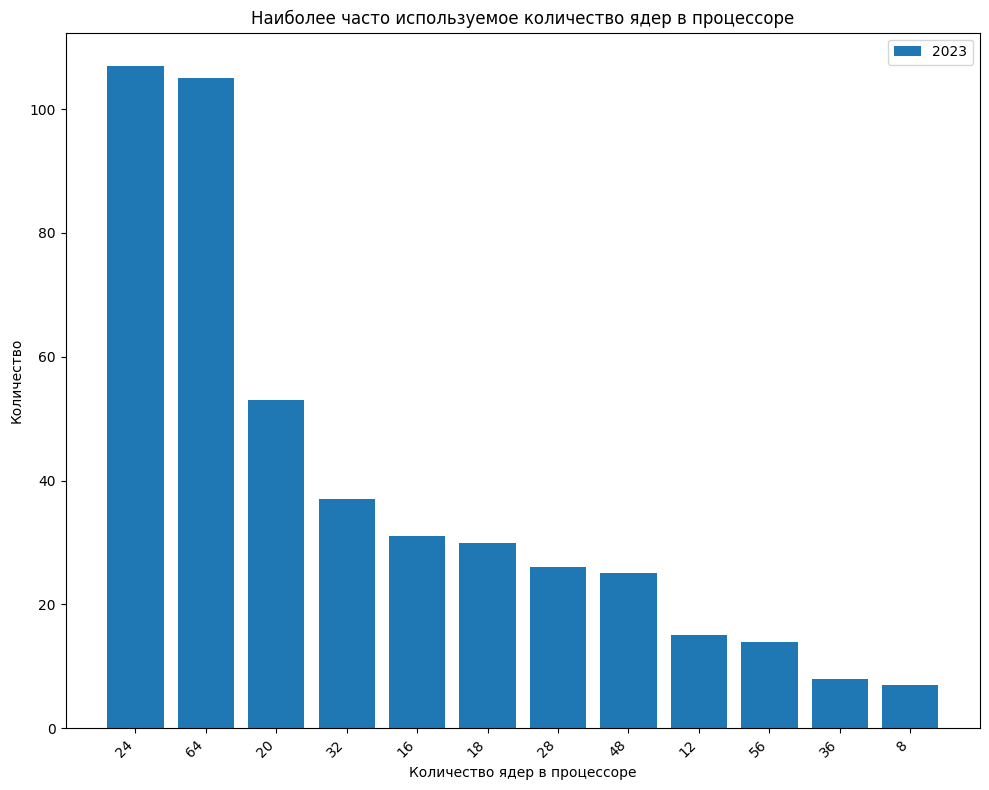

In [16]:
plt.figure(figsize=(10, 8))
# Строим гистограмму для одного из столбцов, так как все столбцы имеют одинаковые значения
plt.bar(df_cores_socket['Cores per Socket'].iloc[:12], df_cores_socket['Count'].iloc[:12], label='2023')

plt.title('Наиболее часто используемое количество ядер в процессоре')
plt.legend()  # Добавляем легенду
plt.xlabel('Количество ядер в процессоре')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.legend()

# Показываем график
plt.show()

In [17]:
# тактовые частоты для процессоров из топ 10
df_processor_frequency = [2500, 2100, 2300, 3700, 3300, 2700, 2000, 2100, 4000, 3600]

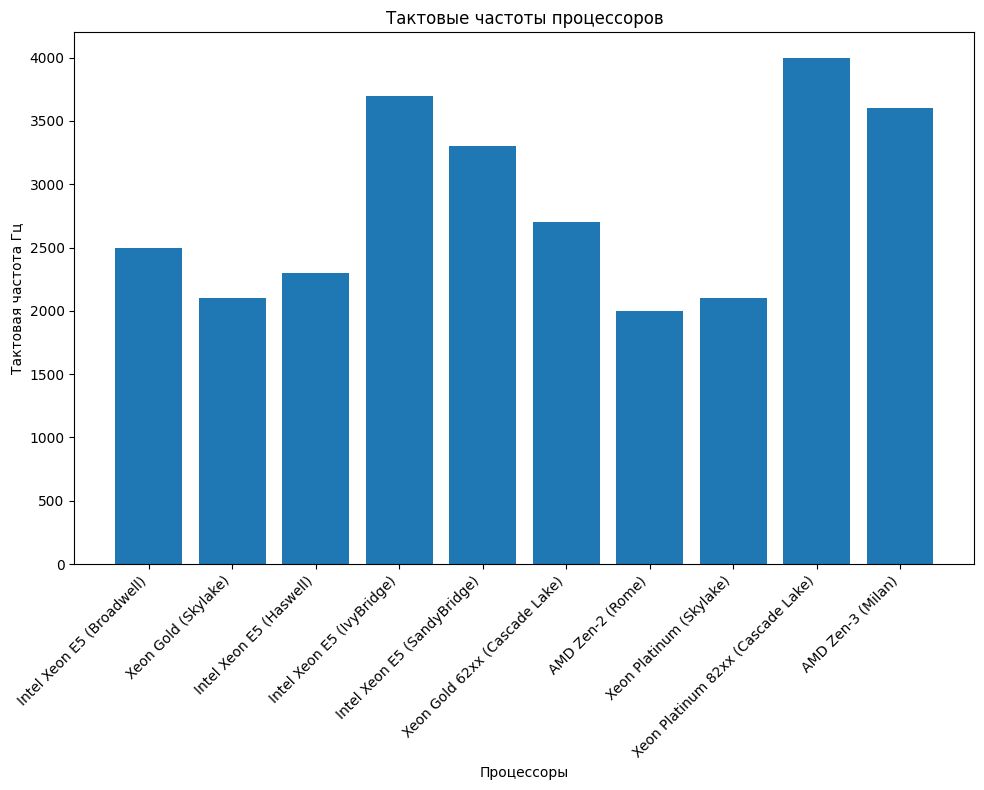

In [18]:
plt.figure(figsize=(10, 8))
# Строим гистограмму для одного из столбцов, так как все столбцы имеют одинаковые значения
plt.bar(df_processor_gener_top.index[:10], df_processor_frequency)

plt.title('Тактовые частоты процессоров')

plt.xlabel('Процессоры')
plt.ylabel('Тактовая частота Гц')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()

# Показываем график
plt.show()

In [19]:
df_cores_socket['Cores per Socket'] = df_cores_socket['Cores per Socket'].astype(int)
df_cores_socket['Count'] = df_cores_socket['Count'].astype(int)

In [20]:
sum(df_cores_socket['Cores per Socket'] * df_cores_socket['Count'])

17626

### Общее число ядер за 10 лет: 17626

### Выводы:

- Анализируя процессоры, применяемые в суперкомпьютерах, можно отметить, что лидером в этой области является процессор Intel Xeon E5. Примечательно, что весь список лидеров включает процессоры Intel, в то время как лишь два процессора AMD встречаются в нижних позициях рейтинга. Этот факт отражает доминирующее положение процессоров Intel в сфере суперкомпьютеров.

- Следует отметить, что наиболее распространенными конфигурациями процессоров суперкомпьютеров являются 24 и 64 ядра. Это указывает на оптимальное сочетание вычислительной мощности и эффективности этих конфигураций для решения широкого спектра задач.

- Также следует обратить внимание на то, что базовые тактовые частоты процессоров суперкомпьютеров относительно невелики и составляют около 2.5 ГГц. Это может быть обусловлено стремлением к снижению энергопотребления и повышению энергоэффективности, что является важным аспектом при развертывании масштабных вычислительных систем.